In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(dataset.head(3))

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   

                  MTRANS     NObeyesdad  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight  
2  Public_Transportation  Normal_Weight  


In [3]:
# 1. Perform basic EDA to understand the structure and distribution of the dataset.
# Shape
print(f"Rows x Columns: {dataset.shape[0]} x {dataset.shape[1]}")


Rows x Columns: 2111 x 17


In [4]:
# Column groups
print("\nColumn Groups:")
numerical_col = dataset.select_dtypes(include="number").columns.tolist()
categorical_col = dataset.select_dtypes(exclude="number").columns.tolist()
print(f"Numerical ({len(numerical_col)}): {numerical_col}")
print(f"Categorical ({len(categorical_col)}): {categorical_col}")


Column Groups:
Numerical (8): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical (9): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [5]:
# Data Types
print("\nData Types:\n", dataset.dtypes)


Data Types:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [6]:
# Non-Unique Values
print("\nNonunique values:\n", dataset.nunique())


Nonunique values:
 Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [7]:
# Missing Values
print("\nMissing Values per Column:\n", dataset.isnull().sum())


Missing Values per Column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
# Duplicate Rows
print("\nDuplicate Rows:", dataset.duplicated().sum())


Duplicate Rows: 24


In [9]:
# Numerical Statistics
print("\nNumerical Statistics:\n", dataset[numerical_col].describe().T.round(3).to_string())


Numerical Statistics:
          count    mean     std    min     25%     50%      75%     max
Age     2111.0  24.313   6.346  14.00  19.947  22.778   26.000   61.00
Height  2111.0   1.702   0.093   1.45   1.630   1.700    1.768    1.98
Weight  2111.0  86.586  26.191  39.00  65.473  83.000  107.431  173.00
FCVC    2111.0   2.419   0.534   1.00   2.000   2.386    3.000    3.00
NCP     2111.0   2.686   0.778   1.00   2.659   3.000    3.000    4.00
CH2O    2111.0   2.008   0.613   1.00   1.585   2.000    2.477    3.00
FAF     2111.0   1.010   0.851   0.00   0.125   1.000    1.667    3.00
TUE     2111.0   0.658   0.609   0.00   0.000   0.625    1.000    2.00


In [10]:
# 2. Plot distributions of key features using histograms, box plots, etc.
numerical_key_features = ["Age", "Weight", "CH2O", "FCVC", "FAF", "TUE"]
categorical_key_features = ['family_history_with_overweight', 'FAVC', 'CAEC', "MTRANS"]

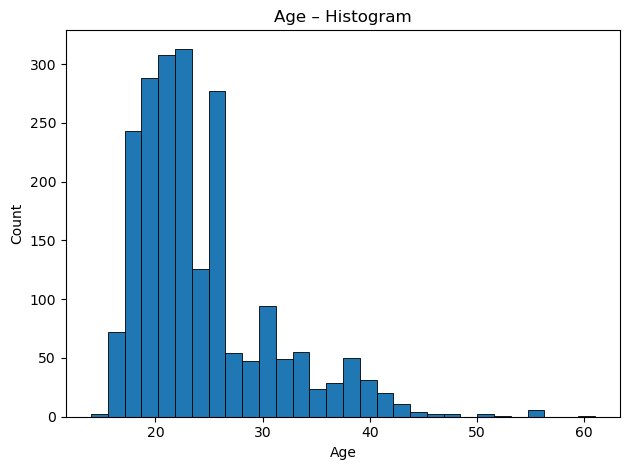

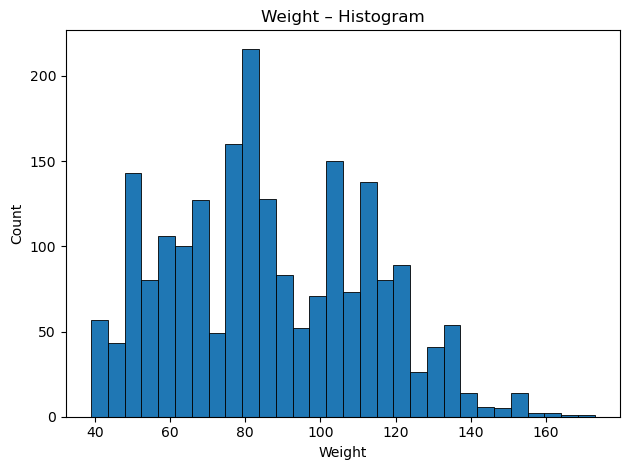

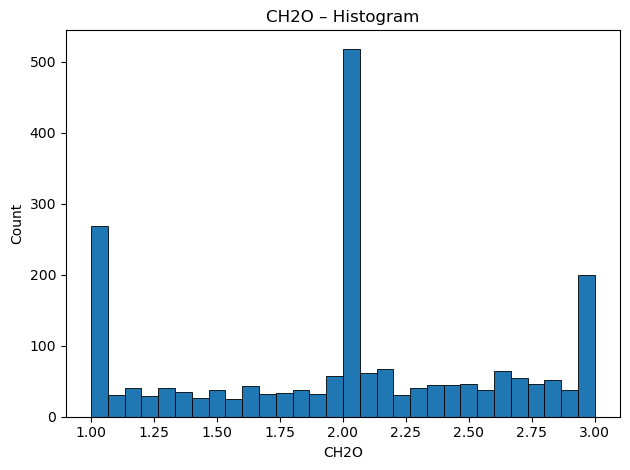

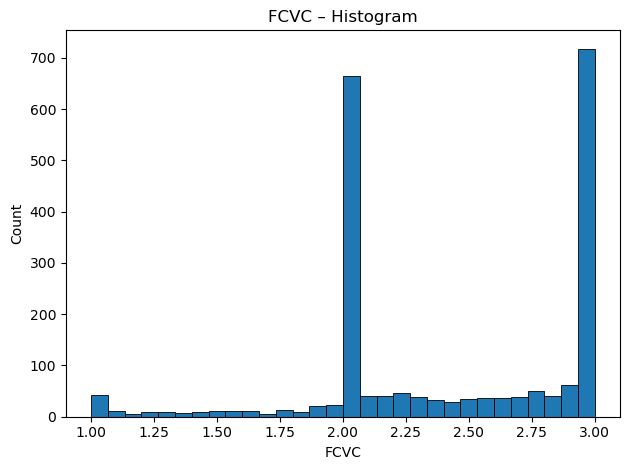

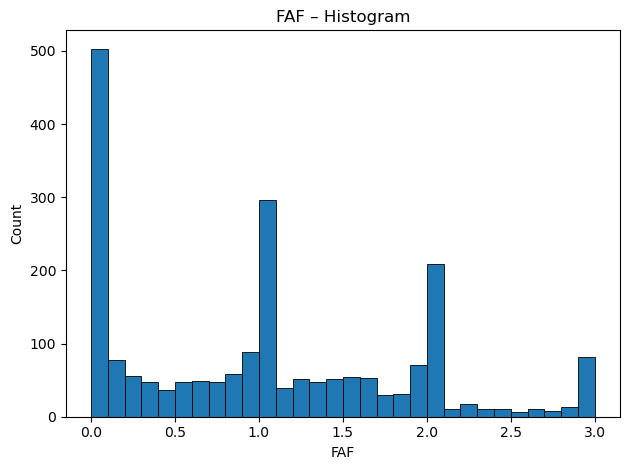

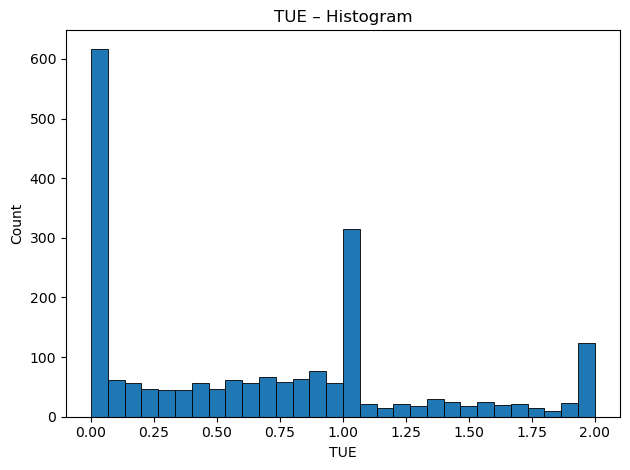

In [11]:
# Plot numerical key features
for num in numerical_key_features:
    plt.figure()
    plt.hist(dataset[num], bins=30, edgecolor="black", linewidth=0.6)
    plt.title(f"{num} – Histogram")
    plt.xlabel(num); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

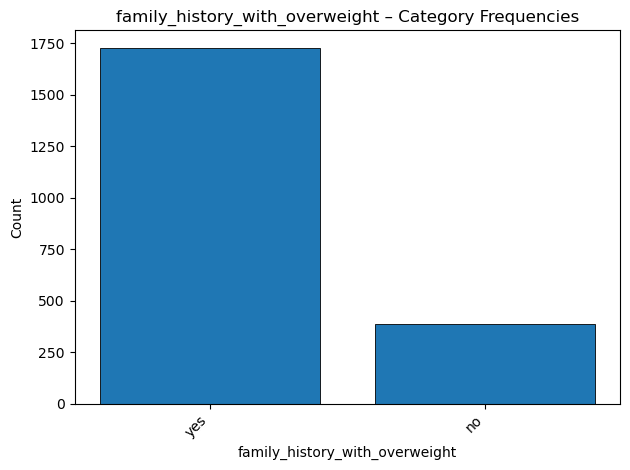

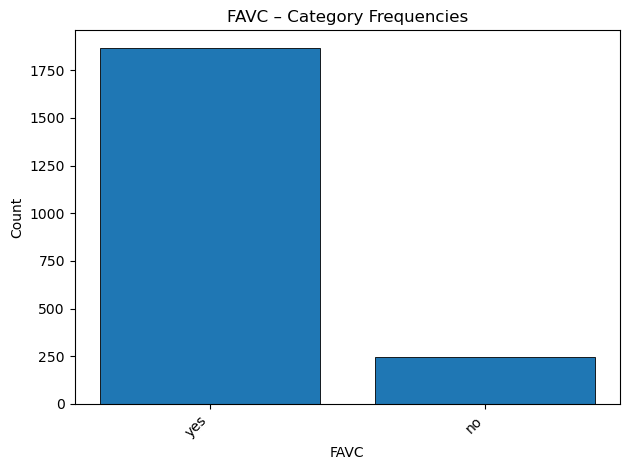

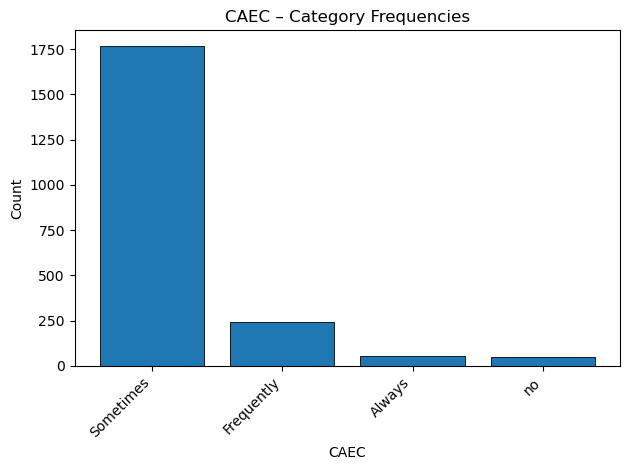

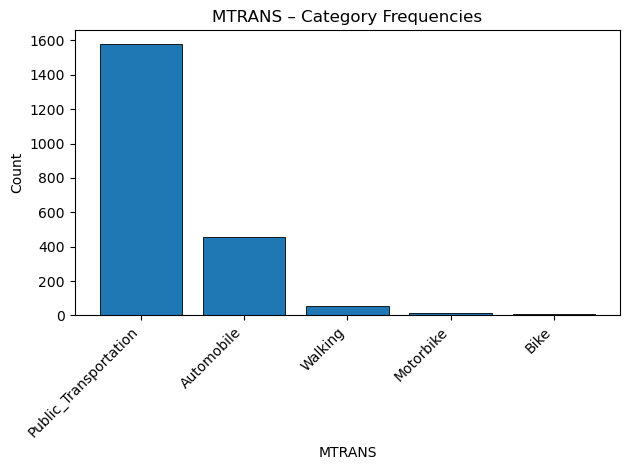

In [12]:
# Plot categorical key features
for cat in categorical_key_features:
    plt.figure()
    data = dataset[cat].value_counts(dropna=False)
    plt.bar([str(x) for x in data.index], data.values, edgecolor="black", linewidth=0.6)
    plt.title(f"{cat} – Category Frequencies")
    plt.xlabel(cat); plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Correlation Matrix (Numerical Features):
          Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
Age     1.000  -0.026   0.203  0.016 -0.044 -0.045 -0.145 -0.297
Height -0.026   1.000   0.463 -0.038  0.244  0.213  0.295  0.052
Weight  0.203   0.463   1.000  0.216  0.107  0.201 -0.051 -0.072
FCVC    0.016  -0.038   0.216  1.000  0.042  0.068  0.020 -0.101
NCP    -0.044   0.244   0.107  0.042  1.000  0.057  0.130  0.036
CH2O   -0.045   0.213   0.201  0.068  0.057  1.000  0.167  0.012
FAF    -0.145   0.295  -0.051  0.020  0.130  0.167  1.000  0.059
TUE    -0.297   0.052  -0.072 -0.101  0.036  0.012  0.059  1.000


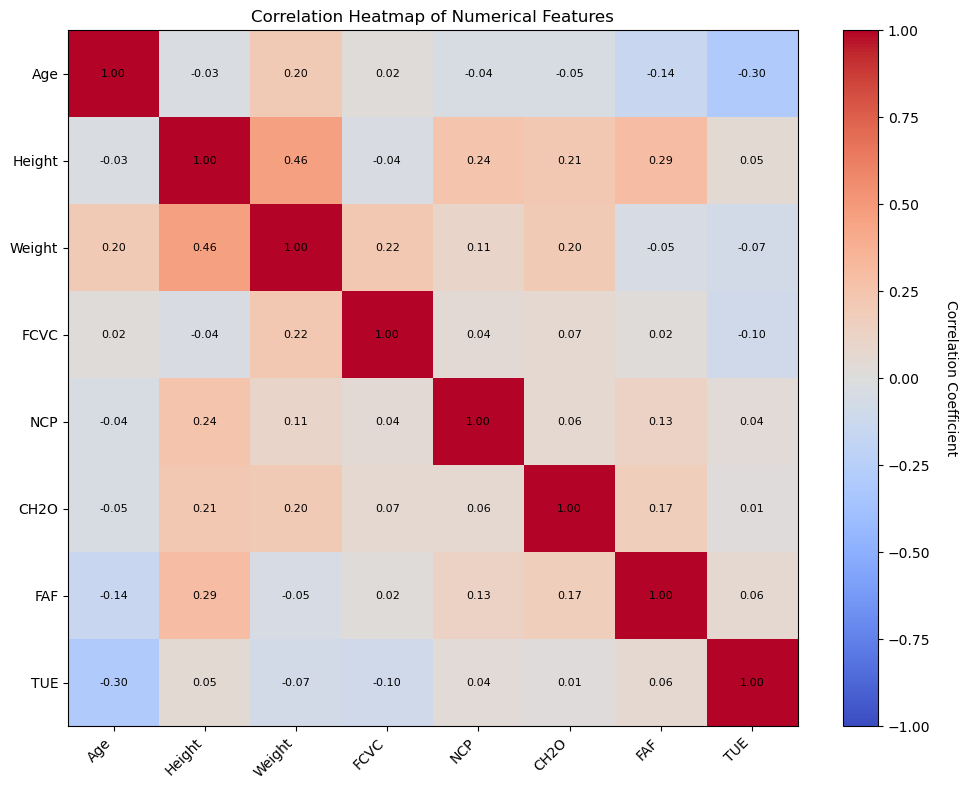

In [13]:
# 3. Visualize relationships between features and identify correlations using heatmaps
# Correlation matrix for numerical features
correlation_matrix = dataset[numerical_col].corr()
print("\nCorrelation Matrix (Numerical Features):")
print(correlation_matrix.round(3).to_string())

# Create correlation heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Set ticks and labels
plt.xticks(range(len(numerical_col)), numerical_col, rotation=45, ha='right')
plt.yticks(range(len(numerical_col)), numerical_col)

# Add correlation values as text
for i in range(len(numerical_col)):
    for j in range(len(numerical_col)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [14]:
# Calculate correlation statistics
all_corrs = []
strong_corr = []
moderate_corr = []
weak_corr = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        feat1 = correlation_matrix.columns[i]
        feat2 = correlation_matrix.columns[j]
        corr = correlation_matrix.iloc[i, j]
        abs_corr = abs(corr)
        
        all_corrs.append(abs_corr)
        
        if abs_corr > 0.5:
            strong_corr.append((feat1, feat2, corr))
        elif abs_corr > 0.3:
            moderate_corr.append((feat1, feat2, corr))
        else:
            weak_corr.append((feat1, feat2, corr))

# Display correlation categories
print(f"\nStrong Correlations (|r| > 0.5): {len(strong_corr)} pairs")
if strong_corr:
    for feat1, feat2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
        direction = "positive" if corr > 0 else "negative"
        print(f"• {feat1} <-> {feat2}: {corr:.3f} ({direction})")
else:
    print("• None found")

print(f"\nModerate Correlations (0.3 < |r| ≤ 0.5): {len(moderate_corr)} pairs")
if moderate_corr:
    for feat1, feat2, corr in sorted(moderate_corr, key=lambda x: abs(x[2]), reverse=True):
        print(f"• {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("• None found")


Strong Correlations (|r| > 0.5): 0 pairs
• None found

Moderate Correlations (0.3 < |r| ≤ 0.5): 1 pairs
• Height <-> Weight: 0.463


In [15]:
# Display top 5 overall correlations
print(f"\nTop 5 correlations:")
all_pairwise_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        feat1 = correlation_matrix.columns[i]
        feat2 = correlation_matrix.columns[j]
        corr = correlation_matrix.iloc[i, j]
        all_pairwise_corrs.append((feat1, feat2, corr))

top_5_correlations = sorted(all_pairwise_corrs, key=lambda x: abs(x[2]), reverse=True)[:5]

for feat1, feat2, corr in top_5_correlations:
    direction = "positive" if corr > 0 else "negative"
    strength = "STRONG" if abs(corr) > 0.5 else "MODERATE" if abs(corr) > 0.3 else "WEAK"
    print(f"• {feat1} <-> {feat2}: {corr:.3f} ({direction}, {strength})")



Top 5 correlations:
• Height <-> Weight: 0.463 (positive, MODERATE)
• Age <-> TUE: -0.297 (negative, WEAK)
• Height <-> FAF: 0.295 (positive, WEAK)
• Height <-> NCP: 0.244 (positive, WEAK)
• Weight <-> FCVC: 0.216 (positive, WEAK)


In [16]:
# Correlation summary statistics
print(f"\nCorrelation statistics summary:")
n_features = len(correlation_matrix.columns)
expected_correlations = (n_features * (n_features - 1)) // 2
print(f"• Mean absolute correlation: {np.mean(all_corrs):.3f}")
print(f"• Maximum correlation: {np.max(all_corrs):.3f}")
print(f"• Correlation distribution:")
print(f"  - Strong (|r| > 0.5): {len(strong_corr)} pairs ({len(strong_corr)/len(all_corrs)*100:.1f}%)")
print(f"  - Moderate (0.3 < |r| ≤ 0.5): {len(moderate_corr)} pairs ({len(moderate_corr)/len(all_corrs)*100:.1f}%)")
print(f"  - Weak (|r| ≤ 0.3): {len(weak_corr)} pairs ({len(weak_corr)/len(all_corrs)*100:.1f}%)")


Correlation statistics summary:
• Mean absolute correlation: 0.122
• Maximum correlation: 0.463
• Correlation distribution:
  - Strong (|r| > 0.5): 0 pairs (0.0%)
  - Moderate (0.3 < |r| ≤ 0.5): 1 pairs (3.6%)
  - Weak (|r| ≤ 0.3): 27 pairs (96.4%)


In [17]:

# 4. Discuss key insights drawn from EDA and potential challenges with the dataset
print("\nKEY INSIGHTS FROM EDA")
print("\nDataset Overview:")
print(f"• Samples: {dataset.shape[0]}, Features: {dataset.shape[1] - 1}")
print(f"• Target: NObeyesdad (7 obesity classes)")
print(f"• Data Quality: No missing values, {dataset.duplicated().sum()} duplicates")

print("\nDemographic Profile:")
gender_counts = dataset['Gender'].value_counts()
print(f"• Age Range: {dataset['Age'].min():.0f}-{dataset['Age'].max():.0f} years")
print(f"• Mean Age: {dataset['Age'].mean():.1f} ± {dataset['Age'].std():.1f} years")
print(f"• Gender: {gender_counts['Male']} Male, {gender_counts['Female']} Female")
print(f"• Young Adults (<25): {(dataset['Age'] < 25).sum()/len(dataset)*100:.1f}%")



KEY INSIGHTS FROM EDA

Dataset Overview:
• Samples: 2111, Features: 16
• Target: NObeyesdad (7 obesity classes)
• Data Quality: No missing values, 24 duplicates

Demographic Profile:
• Age Range: 14-61 years
• Mean Age: 24.3 ± 6.3 years
• Gender: 1068 Male, 1043 Female
• Young Adults (<25): 64.1%


In [18]:
print("\nPhysical Measurements:")
print(f"• Height: {dataset['Height'].min():.2f}-{dataset['Height'].max():.2f} meters")
print(f"• Weight: {dataset['Weight'].min():.1f}-{dataset['Weight'].max():.1f} kg")

print("\nKey Correlations:")
for feat1, feat2, corr in top_5_correlations:
    direction = "positive" if corr > 0 else "negative"
    print(f"• {feat1} <-> {feat2}: {corr:.3f} ({direction})")

print("\nPotential Challenges")


Physical Measurements:
• Height: 1.45-1.98 meters
• Weight: 39.0-173.0 kg

Key Correlations:
• Height <-> Weight: 0.463 (positive)
• Age <-> TUE: -0.297 (negative)
• Height <-> FAF: 0.295 (positive)
• Height <-> NCP: 0.244 (positive)
• Weight <-> FCVC: 0.216 (positive)

Potential Challenges


In [19]:
# Challenge 1: Weak Correlation between most features
print("\n1. Weak Feature Correlations:")
print(f"• Mean absolute correlation: {np.mean(all_corrs):.3f}")
print(f"• Strongest correlation: Height ↔ Weight (r = {correlation_matrix.loc['Height', 'Weight']:.3f})")
print(f"• {len(weak_corr)} of {len(all_corrs)} feature pairs show weak correlations (|r| ≤ 0.3)")


1. Weak Feature Correlations:
• Mean absolute correlation: 0.122
• Strongest correlation: Height ↔ Weight (r = 0.463)
• 27 of 28 feature pairs show weak correlations (|r| ≤ 0.3)


In [20]:
# Challenge 2: Duplicate Rows
print("\n2. Duplicate Rows:")
print(f"• Found: {dataset.duplicated().sum()} duplicate rows")

# Challenge 3: Feature Scaling Requirements
print("\n3. Feature Scaling Requirements:")
print("• Features have very different ranges:")
print(f"  - Weight: {dataset['Weight'].min():.0f}-{dataset['Weight'].max():.0f}")
print(f"  - TUE: {dataset['TUE'].min():.0f}-{dataset['TUE'].max():.0f}")
print(f"  - Age: {dataset['Age'].min():.0f}-{dataset['Age'].max():.0f}")


2. Duplicate Rows:
• Found: 24 duplicate rows

3. Feature Scaling Requirements:
• Features have very different ranges:
  - Weight: 39-173
  - TUE: 0-2
  - Age: 14-61


In [21]:
# Key Insights summary 
print("\n1. We notice that the target variable is well-distributed across "
"the obesity categories, which reduces the risk of bias towards any class.")
print("2. There are no missing values which simplifies the preprocessing stage.")
print("3. Some features such as Age, Height, and Weight have a wide range of values, " \
"that can help model diverse patterns.")
print("4. Feature correlations mostly have weak correlations with each other and the target. Weak correlations" \
" imply that individual features alone might not strongly predict obesity categories, highlighting the " \
"need for using multiple features to capture the relationship.")
print("5. There are 24 duplicate rows, which must be removed as they can add a slight bias analysis.")


1. We notice that the target variable is well-distributed across the obesity categories, which reduces the risk of bias towards any class.
2. There are no missing values which simplifies the preprocessing stage.
3. Some features such as Age, Height, and Weight have a wide range of values, that can help model diverse patterns.
4. Feature correlations mostly have weak correlations with each other and the target. Weak correlations imply that individual features alone might not strongly predict obesity categories, highlighting the need for using multiple features to capture the relationship.
5. There are 24 duplicate rows, which must be removed as they can add a slight bias analysis.


In [22]:
# Data Preprocessing Requirements 
print("Datapreprocessing Requirements")
# 1. Handle missing values appropriately (e.g., imputation, removal)
# Check for duplicates
duplicate_count_before = dataset.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count_before}")
print(f"Dataset size before removing duplicates: {len(dataset)} rows")

if duplicate_count_before > 0:
    # Remove duplicates
    dataset = dataset.drop_duplicates()
    # Verify removal
    duplicate_count_after = dataset.duplicated().sum()
    rows_removed = duplicate_count_before - duplicate_count_after
    print(f"Dataset size after removing duplicates: {len(dataset)} rows")
    print(f"Removed {rows_removed} duplicate rows")
else:
    print("No duplicate rows found")

# Reset index after removing duplicates
dataset = dataset.reset_index(drop=True)

Datapreprocessing Requirements

Duplicate rows found: 24
Dataset size before removing duplicates: 2111 rows
Dataset size after removing duplicates: 2087 rows
Removed 24 duplicate rows


In [23]:
#Handle Missing Values
missing_values = dataset.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
    print(f"\nMissing values found:")
    print(missing_values[missing_values > 0])
    # Add your imputation/removal logic here
else:
    print("\nNo missing values found in the dataset")


No missing values found in the dataset


In [26]:
# Normalization on Weight and Height attribute using Min-max scaling
columns_to_be_normalaized = ["Height", "Weight"]

dataset[columns_to_be_normalaized] = (dataset[columns_to_be_normalaized] - dataset[columns_to_be_normalaized].min()) / (
    dataset[columns_to_be_normalaized].max() - dataset[columns_to_be_normalaized].min())

# First few rows of hieghts and weights after normalization
print("first few rows of height and weight after normalization:")
print(dataset[columns_to_be_normalaized].head())

first few rows of height and weight after normalization:
   Gender   Age    Height    Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0  0.320755  0.186567                            yes   no   2.0   
1  Female  21.0  0.132075  0.126866                            yes   no   3.0   
2    Male  23.0  0.660377  0.283582                            yes   no   2.0   
3    Male  27.0  0.660377  0.358209                             no   no   3.0   
4    Male  22.0  0.622642  0.379104                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  

In [27]:
# One hot encoding the categorical attributes

categorical_cols = ["Gender", "FAVC", "MTRANS"]

dataset = pd.get_dummies(dataset, columns=categorical_cols)

print(dataset.head())


    Age    Height    Weight family_history_with_overweight  FCVC  NCP  \
0  21.0  0.320755  0.186567                            yes   2.0  3.0   
1  21.0  0.132075  0.126866                            yes   3.0  3.0   
2  23.0  0.660377  0.283582                            yes   2.0  3.0   
3  27.0  0.660377  0.358209                             no   3.0  3.0   
4  22.0  0.622642  0.379104                             no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  ...           NObeyesdad  Gender_Female  \
0  Sometimes    no   2.0   no  ...        Normal_Weight           True   
1  Sometimes   yes   3.0  yes  ...        Normal_Weight           True   
2  Sometimes    no   2.0   no  ...        Normal_Weight          False   
3  Sometimes    no   2.0   no  ...   Overweight_Level_I          False   
4  Sometimes    no   2.0   no  ...  Overweight_Level_II          False   

  Gender_Male FAVC_no  FAVC_yes  MTRANS_Automobile  MTRANS_Bike  \
0       False    True     False              Fals